Model Name: Doc2Vec

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
data = pd.read_csv('../CSV/Data/preped_data.csv')

labels = pd.read_csv('../CSV/Data/labels.csv')

In [4]:
data.shape

(9494, 12)

In [5]:
labels.shape

(220, 1)

In [6]:
data['merged'] = data['description'].fillna('') + ' ' + data['business_tags'].fillna('') + ' ' + data['sector'].fillna('') + ' ' + data['category'].fillna('') + ' ' + data['niche'].fillna('')

datas = [TaggedDocument(words = word_tokenize(text), tags = [str(i)]) for i, text in enumerate(data['merged'])]

model = Doc2Vec(datas, vector_size = 4500, window = 5, min_count = 2, workers = 4, dm=0)

In [7]:
#2 minutes
data['embedding'] = data['merged'].apply(lambda x: model.infer_vector(word_tokenize(x)))

labels['embedding'] = labels['label'].apply(lambda x: model.infer_vector(word_tokenize(x)))

In [8]:
data_embeddings = list(data['embedding'])
label_embeddings = list(labels['embedding'])

In [9]:
similarities = cosine_similarity(data_embeddings, label_embeddings)

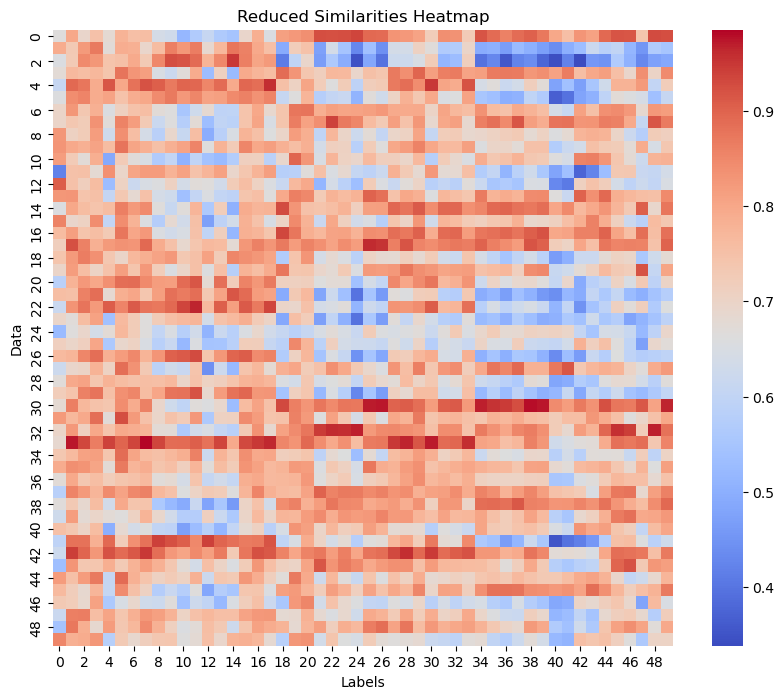

In [10]:
reduced_similarities = similarities[:50, :50] 

plt.figure(figsize=(10, 8))
sns.heatmap(reduced_similarities, cmap='coolwarm', cbar=True)
plt.title("Reduced Similarities Heatmap")
plt.xlabel("Labels")
plt.ylabel("Data")
plt.show()

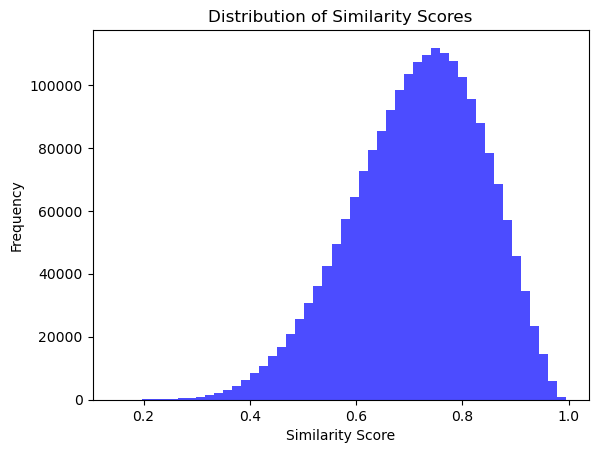

In [11]:
flattened_similarities = similarities.flatten()
plt.hist(flattened_similarities, bins=50, color='blue', alpha=0.7)
plt.title("Distribution of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
def get_top_labels(similarities, labels, top_n=3):
    top_indices = similarities.argsort()[:, -top_n:][:, ::-1]
    top_labels_with_scores = [[(labels[i], similarities[row_idx, i]) for i in indices] for row_idx, indices in enumerate(top_indices)]
    return top_labels_with_scores

In [13]:
data['top_labels'] = get_top_labels(similarities, labels['label'])

In [ ]:
data[['description', 'business_tags', 'sector', 'category', 'niche', 'top_labels']].to_csv('../CSV/Tries/labbeled_data_dbow.csv', index=False)